# Data Wrangling



We've  a **transaction-level** dataset. In other words, each observation in the raw dataset is for a single transaction - one item, one customer, one purchase.

Therefore, to get a **customer-level** data (since we want to build clusters for customers, not transactions) we need to **aggregate transactions by customer** and **engineer customer-level features**.

- This step blends together exploratory analysis, data cleaning, and aggregating the transaction-level data







### Importing libraries and load the dataset.


In [40]:
from __future__ import  print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing the dataset which includes UK and Non-UK data


In [41]:
# Load online transactions data from CSV- UK and Non-UK
df = pd.read_csv('C:/Users/sa10320/Dumps/Springboard/Capstone2/Ecommerce/ecommerce-data/data.csv',encoding="ISO-8859-1",dtype={'InvoiceNo': str,'CustomerID': str,'Country': str})

Now we're ready to jump into wrangling the data!

<span id="exploration"></span>
# 1. Transaction-level exploratory data analysis



<br>
**Display the shape of the dataset.**

In [42]:
# Dataframe dimensions
df.shape

(541909, 8)

In [43]:
df1=df[(df.Country=='United Kingdom')].CustomerID.unique()
len(df1)


3951

In [44]:
df2=df[(df.Country!='United Kingdom')].CustomerID.unique()
len(df2)


423

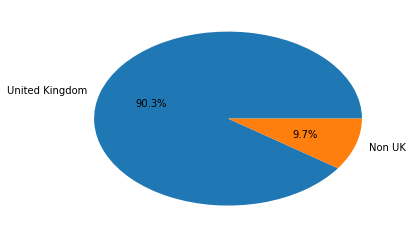

In [45]:
pie_data = []
pie_data.append(len(df1))
pie_data.append(len(df2))
plt.pie(pie_data, labels=['United Kingdom', 'Non UK'], autopct='%1.1f%%',)
plt.show()

As, we can see the dataset contains most of the transactional record from UK, so we will create a dataframe for international transaction i.e other than United Kingdom for our analysis and solution

In [46]:
df=df[(df.Country!='United Kingdom')]

In [47]:
len(df)

46431

In [68]:
df.to_csv('data_v1.csv',index=None)

Read new data with international transactions

In [69]:
df = pd.read_csv('C:/Users/sa10320/Dumps/Springboard/Capstone2/Ecommerce/ecommerce-data/data_v1.csv',encoding="ISO-8859-1",dtype={'InvoiceNo': str,'CustomerID': str,'Country': str})

**Next, display the first 10 observations from the dataset.**

In [71]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/2010 8:45,1.25,12583,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/2010 8:45,2.95,12583,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/2010 8:45,2.95,12583,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/2010 8:45,1.95,12583,France


**Finally, display the distribution of transactions by country.**

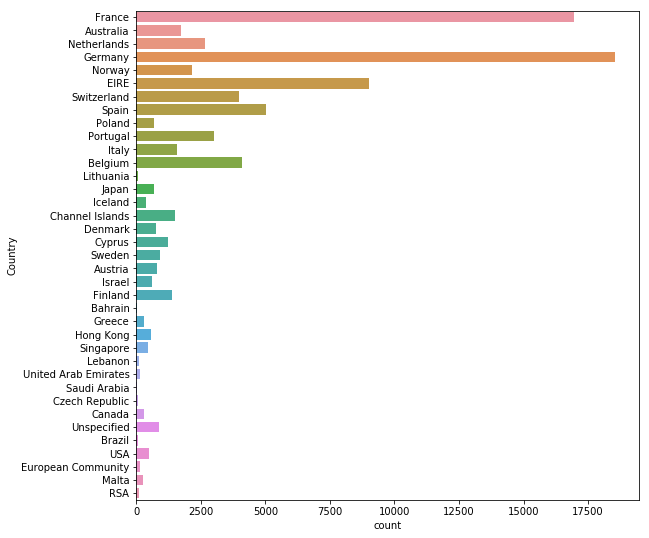

In [72]:
# Make figsize 9x9
plt.figure(figsize=(9,9))

# Bar plot by country
sns.countplot(y = 'Country', data=df)
plt.show()


# 2. Transaction-level Data cleaning

Before aggregating to the customer level, we need to clean data at transaction level.

<br>
**Display the number of missing observations for each feature.**

In [73]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2898
Country           0
dtype: int64

**Drop observations with missing customer ID's.**

In [74]:
df.dropna(inplace=True)

In [75]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

** Converting Quantity to Sterling Sales Value **


In [76]:
df["Sales"] = df["UnitPrice"] * df["Quantity"]
df["Sales"].head(5)

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

** Create a cleaned transaction-level dataset into csv **

In [77]:
df.to_csv('cleaned_data.csv', index=None)

# 3. Customer-level data Aggregation



Rolling transaction level to the customer level, will use into our machine learning algorithms later.


**First, we'll aggegrate invoice data by customer.**
* Aggregating invoice data per customer 

In [81]:
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({'total_transactions':'nunique'})
invoice_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,11


** Aggregating product data by customer**


In [80]:
product_data = df.groupby('CustomerID').StockCode.agg({
                                'total_products':'count',
                                 'total_unique_products':'nunique'})
product_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,total_products,total_unique_products
CustomerID,,
12347,364,103
12348,62,22
12349,146,73
12350,34,17
12352,180,59


** Aggregate sales data by customer **

In [83]:
sales_data = df.groupby('CustomerID').Sales.agg({'total_sales': 'sum','avg_product_value': 'mean'})
sales_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,total_sales,avg_product_value
CustomerID,,
12347,8620.00,23.681319
12348,3594.48,57.975484
12349,3515.10,24.076027
12350,668.80,19.670588
12352,4051.45,22.508056


# 4. Aggregating Cart data to Customer level

** Considering each invoice as a cart **

In [88]:
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg({'cart_value': 'sum' })
cart_data.reset_index(inplace=True)  
cart_data.head()          

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,CustomerID,InvoiceNo,cart_value
0,12347,537626,1423.58
1,12347,542237,950.78
2,12347,549222,1272.50
3,12347,556201,765.04
4,12347,562032,1169.82


**Aggregate cart data by customer. **
* <code style="color:steelblue">'avg_cart_value'</code> - average cart value by customer.
* <code style="color:steelblue">'min_cart_value'</code> - minimum cart value by customer.
* <code style="color:steelblue">'max_cart_value'</code> - maximum cart value by customer.


In [89]:
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({
    'avg_cart_value': 'mean',
    'min_cart_value': 'min',
    'max_cart_value': 'max'
})

agg_cart_data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,1231.428571,449.64,2588.64
12348,898.620000,454.88,1785.60
12349,3515.100000,3515.10,3515.10
12350,668.800000,668.80,668.80
12352,368.313636,-463.80,1680.60


<span id="joining"></span>
# 5. Joining together all customer dataframes


* By default, it will join the dataframes on their index. In this case, it will join by CustomerID

In [90]:
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,364,103,8620.00,23.681319,1231.428571,449.64,2588.64
12348,4,62,22,3594.48,57.975484,898.620000,454.88,1785.60
12349,1,146,73,3515.10,24.076027,3515.100000,3515.10,3515.10
12350,1,34,17,668.80,19.670588,668.800000,668.80,668.80
12352,11,180,59,4051.45,22.508056,368.313636,-463.80,1680.60


** Converting custoner data frame to use later.**

In [91]:
customer_df.to_csv('Customer_df_analysis.csv')